# Introduction
In this practical, we implement and train a feed-forward neural network (also known as an "MLP" for "multi-layer perceptron") on a dataset called "Fashion MNIST", consisting of small greyscale images of items of fashion.

# Learning Objectives

* Understand how to use Keras Layers to build a neural network architecture
* Understand how a model is trained and evaluated
* Understand the concept of train/validation/test split and why it's useful

In [1]:
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf


# Data
In this practical, we use the Fashion MNIST dataset consisting of 70,000 greyscale images and their labels. The dataset is divided
 into 60,000 training images and 10,000 test images. The idea is to train a **classifier** to identify the class value (what type of fashion item it is) given the image. We train and *tune* a model on the 60,000 training images and then evaluate how well it classifies the 10,000 test images that the model did not see during training. This task is an example of a **supervised learning** problem, where we are given both input and labels (targets) to learn from. This is in contrast to **unsupervised learning** where we only have inputs from which to learn patterns or **reinforcement learning** where an agent learns how to maximise a reward signal through interaction with its environment. 

![Texte alternatif…](https://res.cloudinary.com/practicaldev/image/fetch/s---fNWEeWA--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

# Train/Validation/Test Split

When we build machine learning models, the goal is to build a model that will perform well on future data that we have not seen yet. We say that we want our models to be able to generalise well from whatever training data we can collect and do have available, to whatever data we will be applying them to in future. To do this, we split whatever data we have available into a training set, a validation set and a test set. The idea is that we train our model and use the performance on the validation set to make any adjustments to the model and its hyperparameters, but then we report the final accuracy on the test set. The test set (which we never train on), therefore acts as a proxy for our future data.

In [2]:
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 1s 35us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 736s 28us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 122s 28us/step


In [3]:
# Construct a validation set from the last 10000 images and labels from 
# train_and_validation_images and train_and_validation_labels
validation_images = train_and_validation_images[-10000:, :, :]
validation_labels = train_and_validation_labels[-10000:]
# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000]

In [4]:
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

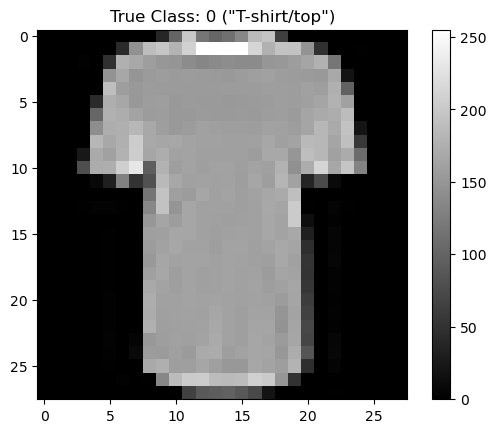

In [5]:
plt.figure()
random_index = np.random.randint(0, len(train_images))
plt.imshow(train_images[random_index], cmap='gray')
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(False)

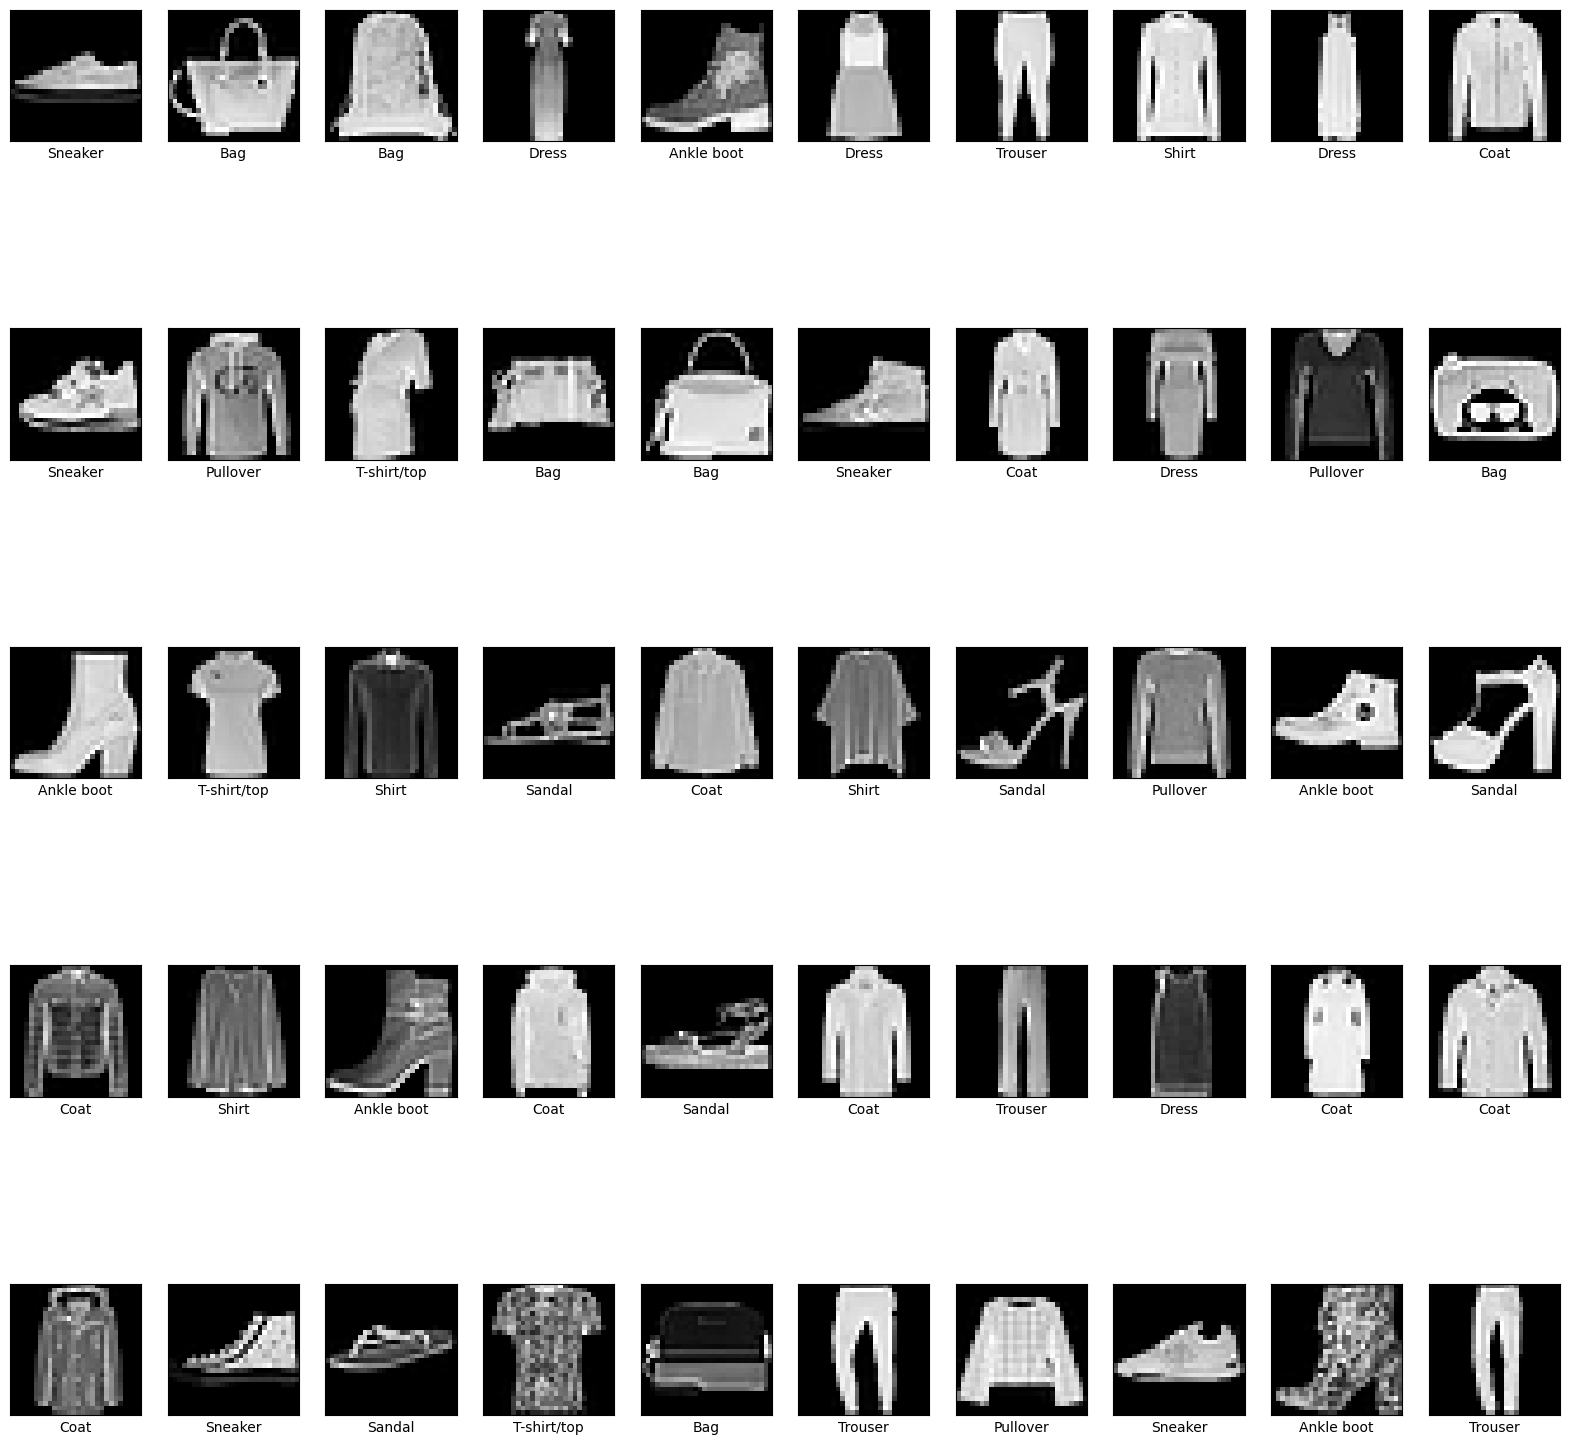

In [6]:
# Another view, showing 50 randomly selected images at a time
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap=plt.cm.gray)
    plt.xlabel(text_labels[train_labels[img_index]])

# Preprocess

In [7]:
# Flatten

train_images_flatten = train_images.reshape(train_images.shape[0], 784)
validation_images_flatten = validation_images.reshape(validation_images.shape[0], 784)
test_images_flatten = test_images.reshape(test_images.shape[0], 784)

In [8]:
# Normalize

train_images_model = train_images_flatten/255.
validation_images_model = validation_images_flatten/255
test_images_model = test_images_flatten/255 

In [9]:
# convert class vectors to binary class matrices
train_labels_categ = keras.utils.to_categorical(train_labels, 10)
validation_labels_categ = keras.utils.to_categorical(validation_labels, 10)
test_labels_categ = keras.utils.to_categorical(test_labels, 10)

# Train

In [12]:
batch_size = 128
num_classes = 10
epochs = 40

# Create a sequential model here 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# Create the sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Create the sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(256, activation='relu', input_shape=(784,)))  # Input layer, 256 neurons
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(Dense(128, activation='relu'))  # Hidden layer, 128 neurons
model.add(Dense(num_classes, activation='softmax'))  # Output layer, 10 neurons (one per class)

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

# End Code

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
batch_size = 128
epochs = 40
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_images_model, train_labels_categ,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_images_model, validation_labels_categ))


Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7132 - loss: 0.8102 - val_accuracy: 0.8461 - val_loss: 0.4212
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8421 - loss: 0.4298 - val_accuracy: 0.8250 - val_loss: 0.4840
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8617 - loss: 0.3805 - val_accuracy: 0.8498 - val_loss: 0.3969
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8713 - loss: 0.3457 - val_accuracy: 0.8771 - val_loss: 0.3400
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8778 - loss: 0.3280 - val_accuracy: 0.8738 - val_loss: 0.3483
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8833 - loss: 0.3122 - val_accuracy: 0.8754 - val_loss: 0.3448
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8886 - loss: 0.2999 - val_accuracy: 0.8769 - val_loss: 0.3504
Epoch 8/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8894 - loss: 0.2965 - val_accuracy: 0.

# Test

In [15]:
# Evaluate the model on the test set
score = model.evaluate(test_images_flatten, test_labels_categ, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.8891000151634216


In [16]:
test_logits = model.predict(test_images_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
test_logits

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
test_predictions = np.argmax(test_logits, axis=1)

In [19]:
test_predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


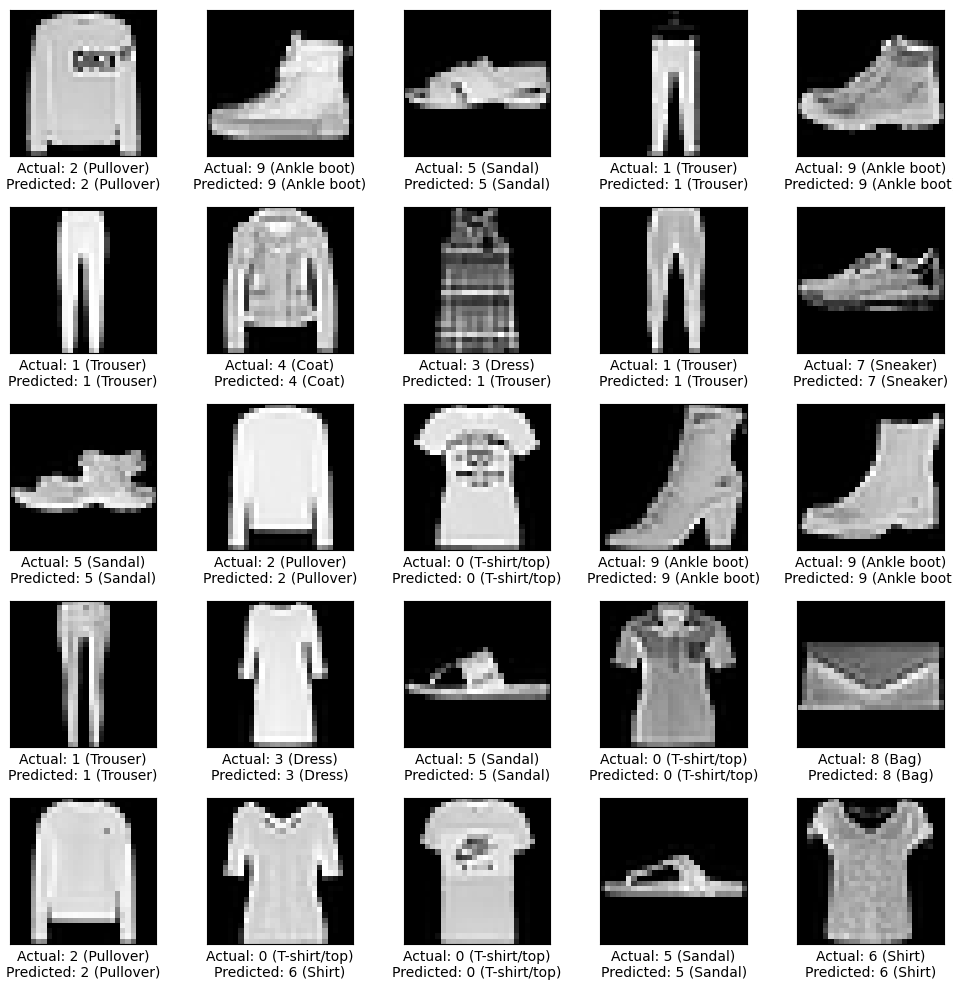

In [22]:
plt.figure(figsize=(10, 10))

# Display 25 random images from the test set
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # Randomly select an image index from the test set
    img_index = np.random.randint(0, len(test_images))
    plt.imshow(test_images[img_index], cmap=plt.cm.gray)
    
    # Get the actual and predicted labels
    actual_label = np.argmax(test_labels_categ[img_index])  # Convert from one-hot encoded to label index
    predicted_label = np.argmax(model.predict(test_images_flatten[img_index].reshape(1, 784)))
    
    # Display the labels
    plt.xlabel("Actual: {} ({})\nPredicted: {} ({})".format(
        actual_label, text_labels[actual_label], 
        predicted_label, text_labels[predicted_label]
    ))

plt.tight_layout()
plt.show()
